<a href="https://colab.research.google.com/github/Yuliana1453/Analisis-TURF-Spotify/blob/main/Analisis_TURF_Spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisis TURF: [Top Hits Spotify 2000-2019](https://www.kaggle.com/code/keremkarayaz/spotify-song-list)
- **Nama        :** Yuliana
- **Kelas       :** Matematika 6A
- **NIM         :** 11220940000024

## Import Semua Packages/Library yang Digunakan

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer
import ipywidgets as widgets
from IPython.display import display, clear_output
import itertools

## Data Wrangling

### Gathering Data

In [4]:
df = pd.read_csv('/content/songs_normalize.csv')
df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


### Assessing Data

In [5]:
# Informasi dasar dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


In [6]:
# Cek missing value dataset
df.isnull().sum()

,0
artist,0
song,0
duration_ms,0
explicit,0
year,0
popularity,0
danceability,0
energy,0
key,0
loudness,0


In [7]:
# Cek duplikat data
df.duplicated().sum()

np.int64(59)

### Cleaning dan Preprocessing Dataset

In [8]:
# Hapus data duplikat
df.drop_duplicates(inplace=True)

In [9]:
# Mengubah kolom 'genre' yang berisi string menjadi list Python
df['genre_list'] = df['genre'].str.split(', ')

In [10]:
df['genre'].unique()

array(['pop', 'rock, pop', 'pop, country', 'rock, metal',
       'hip hop, pop, R&B', 'hip hop', 'pop, rock', 'pop, R&B',
       'Dance/Electronic', 'pop, Dance/Electronic',
       'rock, Folk/Acoustic, easy listening', 'metal', 'hip hop, pop',
       'R&B', 'pop, latin', 'Folk/Acoustic, rock',
       'pop, easy listening, Dance/Electronic', 'rock',
       'rock, blues, latin', 'pop, rock, metal', 'rock, pop, metal',
       'hip hop, R&B', 'pop, Folk/Acoustic', 'set()',
       'hip hop, pop, latin', 'hip hop, Dance/Electronic',
       'hip hop, pop, rock', 'World/Traditional, Folk/Acoustic',
       'Folk/Acoustic, pop', 'rock, easy listening',
       'World/Traditional, hip hop', 'hip hop, pop, R&B, latin',
       'rock, blues', 'rock, R&B, Folk/Acoustic, pop', 'latin',
       'pop, R&B, Dance/Electronic', 'World/Traditional, rock',
       'pop, rock, Dance/Electronic', 'pop, easy listening, jazz',
       'rock, Dance/Electronic', 'World/Traditional, pop, Folk/Acoustic',
       'countr

In [11]:
# Drop baris dengan genre yang tidak valid
df = df[df['genre'] != 'set()']

In [12]:
# Buat dummy genre
mlb = MultiLabelBinarizer()
genre_dummies = pd.DataFrame(mlb.fit_transform(df['genre_list']), columns=mlb.classes_, index=df.index)
df = pd.concat([df, genre_dummies], axis=1)

In [13]:
# Buat dummy artist
mlb_artist = MultiLabelBinarizer()
df['artist_list'] = df['artist'].apply(lambda x: [x] if isinstance(x, str) else [])
artist_dummies = pd.DataFrame(mlb_artist.fit_transform(df['artist_list']), columns=mlb_artist.classes_, index=df.index)
df = pd.concat([df, artist_dummies], axis=1)

## Analisis TURF

IntSlider(value=70, description='Min Popularity:', step=5)

IntSlider(value=100, description='Target Reach %:', min=10, step=5)

SelectMultiple(description='Artist(s):', index=(0,), layout=Layout(width='50%'), options=('All', '*NSYNC', '11…

Button(button_style='success', description='Jalankan Analisis', style=ButtonStyle())

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127926 (\N{MULTIPLE MUSICAL NOTES}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


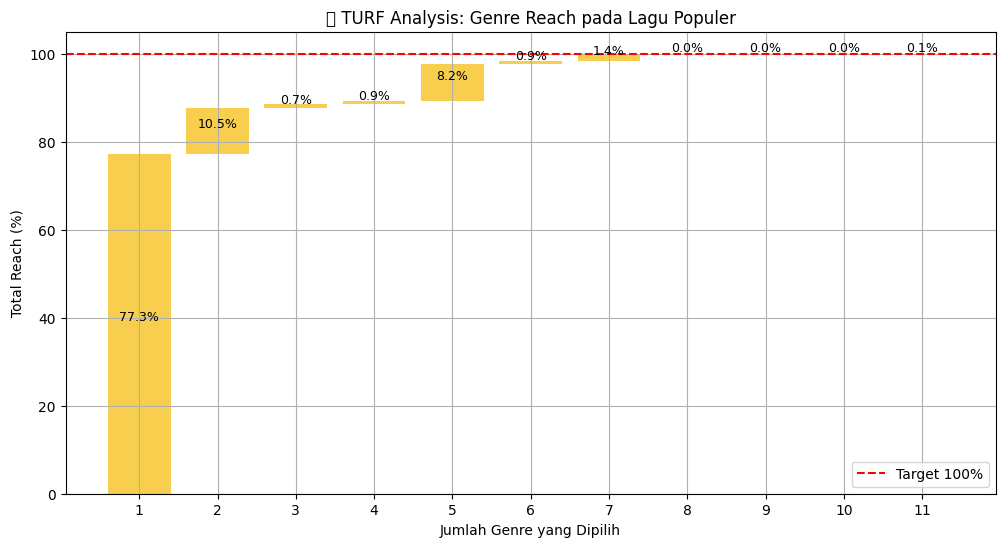

✅ Target 100% tercapai dengan 11 genre.

🎧 Genre pilihan terbaik untuk mencapai target:
['pop', 'hip hop', 'R&B', 'Dance/Electronic', 'rock', 'metal', 'latin', 'Folk/Acoustic', 'country', 'World/Traditional', 'easy listening']


In [19]:
# =====================
# STEP 1: Persiapan Data
# =====================
#  df dan mlb sudah didefinisikan sebelumnya

# Widget kontrol
artist_selector = widgets.SelectMultiple(
    options=["All"] + sorted(df['artist'].dropna().unique().tolist()),
    description='Artist(s):',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='50%')
)

min_popularity_slider = widgets.IntSlider(value=70, min=0, max=100, step=5, description='Min Popularity:')
target_reach_slider = widgets.IntSlider(value=100, min=10, max=100, step=5, description='Target Reach %:')
run_button = widgets.Button(description="Jalankan Analisis", button_style='success')

# Tampilkan widget
display(min_popularity_slider, target_reach_slider, artist_selector, run_button)

# =====================
# STEP 2: Fungsi Analisis
# =====================
def run_turf_analysis(_):
    clear_output(wait=True)
    display(min_popularity_slider, target_reach_slider, artist_selector, run_button)

    # Ambil nilai dari widget
    min_pop = min_popularity_slider.value
    target_pct = target_reach_slider.value / 100
    selected_artists = list(artist_selector.value)

    # ✅ Validasi pemilihan artist
    if "All" in selected_artists and len(selected_artists) > 1:
        print("⚠️ Pilih hanya 'All' ATAU beberapa artis, jangan keduanya sekaligus.")
        return

    # Filter data
    df_filtered = df[df['popularity'] >= min_pop]
    if selected_artists and "All" not in selected_artists:
        df_filtered = df_filtered[df_filtered['artist'].isin(selected_artists)]

    if len(df_filtered) == 0:
        print("⚠️ Data kosong setelah filter! Program dihentikan.")
        return

    target_reach = int(target_pct * len(df_filtered))

    # Hitung reach per genre
    reach_per_genre = df_filtered[mlb.classes_].sum().sort_values(ascending=False)

    # TURF: algoritma greedy
    selected_genres = []
    current_reach = set()
    reach_progress = []

    for genre in reach_per_genre.index:
        new_reach = current_reach | set(df_filtered.index[df_filtered[genre] == 1])
        selected_genres.append(genre)
        reach_progress.append(len(new_reach) / len(df_filtered))

        if len(new_reach) >= target_reach:
            break
        current_reach = new_reach

    # Hitung incremental reach
    incrementals = [reach_progress[0]] + [
        reach_progress[i] - reach_progress[i - 1] for i in range(1, len(reach_progress))
    ]

    # Visualisasi
    plt.figure(figsize=(12, 6))
    bottoms = 0
    for i, inc in enumerate(incrementals):
        plt.bar(f"{i + 1}", inc * 100, bottom=bottoms, color="#f7ce4d")
        plt.text(i, bottoms + inc * 50, f"{inc * 100:.1f}%", ha='center', va='bottom', fontsize=9)
        bottoms += inc * 100

    plt.axhline(y=target_pct * 100, color='r', linestyle='--', label=f'Target {target_pct * 100:.0f}%')
    plt.xlabel("Jumlah Genre yang Dipilih")
    plt.ylabel("Total Reach (%)")
    plt.title("🎶 TURF Analysis: Genre Reach pada Lagu Populer")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Output akhir
    max_reach = max(reach_progress)
    if max_reach >= target_pct:
        print(f"✅ Target {target_pct * 100:.0f}% tercapai dengan {len(selected_genres)} genre.")
    else:
        print(f"⚠️ Target {target_pct * 100:.0f}% TIDAK tercapai.")
        print(f"Maksimum hanya {max_reach * 100:.1f}% dengan {len(selected_genres)} genre.")

    print("\n🎧 Genre pilihan terbaik untuk mencapai target:")
    print(selected_genres[:len(reach_progress)])

# =====================
# STEP 3: Tombol Jalankan
# =====================
run_button.on_click(run_turf_analysis)


**💡 Insight:**
1. Kombinasi 11 genre sudah mencakup 100% lagu populer dengan minimal popular 70%

  Artinya, kamu tidak perlu semua genre untuk menjangkau semua lagu populer — cukup 11 genre.

2. Genre paling dominan = `pop` (76.8%)

  - Hanya dengan satu genre ini saja, kamu sudah bisa menjangkau ~77% lagu populer.

  - Genre ini wajib masuk kalau ingin optimalkan reach.

3. Penambahan genre setelah titik tertentu punya dampak kecil

  - Contoh: setelah 5 genre, tambahan genre hanya meningkatkan reach <1% tiap kali.
  - Itu berarti kamu bisa hemat genre (misalnya cukup 6–8) tapi tetap menjangkau ~95-99% lagu.

**Kesimpulan: Ada 11 genre pilihan terbaik untuk mencapai target, yaitu: `pop`, `hip hop`, `R&B`, `Dance/Electronic`, `rock`, `metal`, `latin`, `Folk/Acoustic`, `country`, `World/Traditional` dan `easy listening`**

IntSlider(value=70, description='Min Popularity:', step=5)

IntSlider(value=100, description='Target Genre Reach %:', min=10, step=5)

SelectMultiple(description='Genre(s):', layout=Layout(width='50%'), options=('All', 'Dance/Electronic', 'Folk/…

Button(button_style='success', description='Jalankan Analisis', style=ButtonStyle())

<ipython-input-21-ee66565e714d>:105: UserWarning: Glyph 127925 (\N{MUSICAL NOTE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127925 (\N{MUSICAL NOTE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


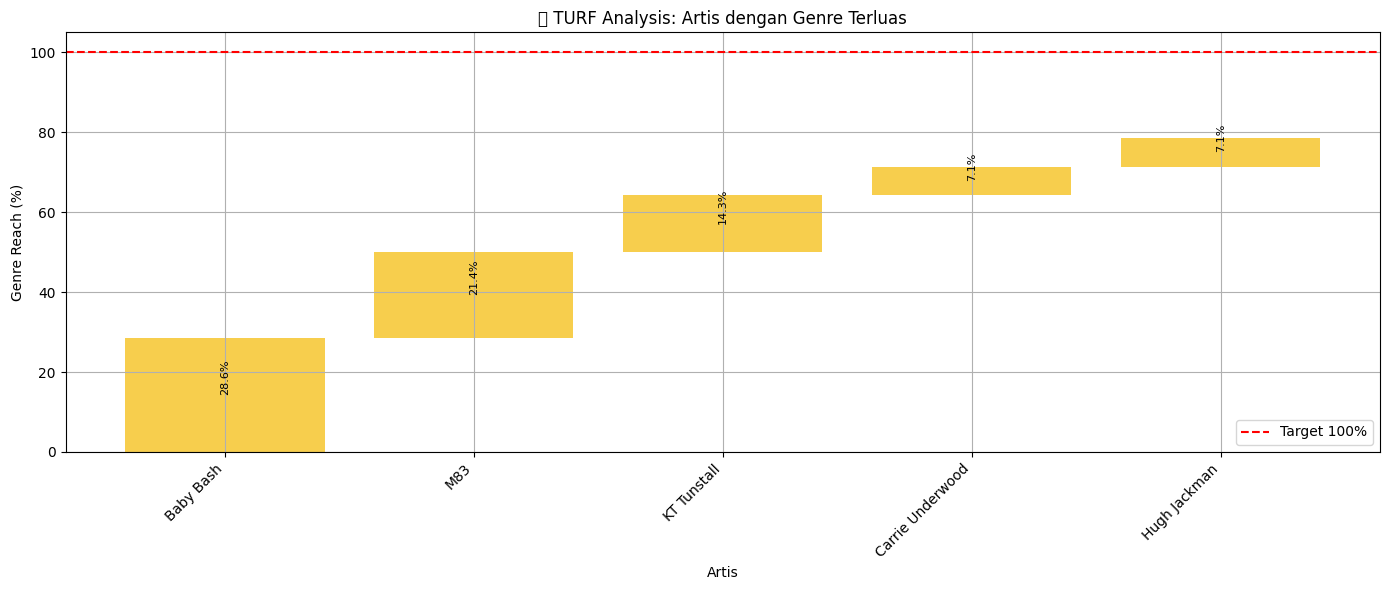

⚠️ Target genre reach 100% TIDAK tercapai.
Hanya mencapai 78.6% dengan 5 artis.

🎧 Artis pilihan terbaik:
1. Baby Bash
2. M83
3. KT Tunstall
4. Carrie Underwood
5. Hugh Jackman


In [21]:
# Ambil list genre dari mlb.classes_
all_genres = sorted(mlb.classes_)

# Widget kontrol
min_popularity_slider = widgets.IntSlider(value=70, min=0, max=100, step=5, description='Min Popularity:')
target_reach_slider = widgets.IntSlider(value=80, min=10, max=100, step=5, description='Target Genre Reach %:')
genre_selector = widgets.SelectMultiple(
    options=["All"] + all_genres,
    description='Genre(s):',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='50%')
)
run_button = widgets.Button(description="Jalankan Analisis", button_style='success')

# Tampilkan widget
display(min_popularity_slider, target_reach_slider, genre_selector, run_button)


def run_turf_artist_genre(_):
    clear_output(wait=True)
    display(min_popularity_slider, target_reach_slider, genre_selector, run_button)

    min_pop = min_popularity_slider.value
    target_pct = target_reach_slider.value / 100
    selected_genres = list(genre_selector.value)

    if "All" in selected_genres and len(selected_genres) > 1:
        print("⚠️ Pilih hanya 'All' ATAU beberapa genre, jangan keduanya sekaligus.")
        return

    # Filter data by popularity
    df_filtered = df[df['popularity'] >= min_pop]

    # Filter data by selected genres (jika tidak pilih 'All')
    if selected_genres and "All" not in selected_genres:
        # Filter rows yang memiliki minimal 1 genre yg dipilih (genre columns bernilai 1)
        mask = df_filtered[selected_genres].sum(axis=1) > 0
        df_filtered = df_filtered[mask]

    if df_filtered.empty:
        print("⚠️ Data kosong setelah filter.")
        return

    # Mapping artis ke genre yg mereka cover
    artist_genres_map = {}
    for artist in df_filtered['artist'].unique():
        df_artist = df_filtered[df_filtered['artist'] == artist]
        genre_sum = df_artist[mlb.classes_].sum()
        covered_genres = set(genre_sum[genre_sum > 0].index)
        if covered_genres:
            artist_genres_map[artist] = covered_genres

    # Target genre count berdasarkan pilihan user atau total genre
    if "All" in selected_genres or not selected_genres:
        total_target_genres = set(all_genres)
    else:
        total_target_genres = set(selected_genres)

    target_genre_count = int(len(total_target_genres) * target_pct)

    # TURF greedy: pilih artis yang nambah genre paling banyak
    selected_artists_turf = []
    current_genres = set()
    reach_progress = []

    while len(current_genres.intersection(total_target_genres)) < target_genre_count and artist_genres_map:
        best_artist = max(
            artist_genres_map.items(),
            key=lambda x: len((x[1].intersection(total_target_genres)) - current_genres)
        )[0]
        new_genres = (artist_genres_map[best_artist].intersection(total_target_genres)) - current_genres

        if not new_genres:
            break

        selected_artists_turf.append(best_artist)
        current_genres |= new_genres
        reach_progress.append(len(current_genres.intersection(total_target_genres)) / len(total_target_genres))

        del artist_genres_map[best_artist]

    # Hitung incremental reach
    if reach_progress:
        incrementals = [reach_progress[0]] + [
           reach_progress[i] - reach_progress[i - 1] for i in range(1, len(reach_progress))
        ]
    else:
        incrementals = []

    # Visualisasi
    plt.figure(figsize=(14, 6))
    bottoms = 0
    for i, (artist, inc) in enumerate(zip(selected_artists_turf, incrementals)):
        plt.bar(artist, inc * 100, bottom=bottoms, color="#f7ce4d")
        plt.text(i, bottoms + inc * 50, f"{inc * 100:.1f}%", ha='center', va='bottom', fontsize=8, rotation=90)
        bottoms += inc * 100

    plt.axhline(y=target_pct * 100, color='red', linestyle='--', label=f'Target {target_pct * 100:.0f}%')
    plt.xlabel("Artis")
    plt.ylabel("Genre Reach (%)")
    plt.title("🎵 TURF Analysis: Artis dengan Genre Terluas")
    plt.xticks(rotation=45, ha='right')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Output
    if not incrementals:
        print("⚠️ Tidak ada artis yang menambah genre baru. Coba ubah filter atau parameter.")
        return

    max_reach = reach_progress[-1] if reach_progress else 0
    if max_reach >= target_pct:
        print(f"✅ Target genre reach {target_pct*100:.0f}% tercapai dengan {len(selected_artists_turf)} artis.")
    else:
        print(f"⚠️ Target genre reach {target_pct*100:.0f}% TIDAK tercapai.")
        print(f"Hanya mencapai {max_reach*100:.1f}% dengan {len(selected_artists_turf)} artis.")

    print("\n🎧 Artis pilihan terbaik:")
    for idx, artist in enumerate(selected_artists_turf, 1):
        print(f"{idx}. {artist}")

run_button.on_click(run_turf_artist_genre)


**🧠 Insight:**
1. Kombinasi 5 artis terbaik hanya mampu menjangkau 78.6% dari semua genre yang ditargetkan, belum menyentuh target ideal 100%.

2. Kontribusi Masing-masing Artis:

  - Baby Bash → Reach 28.6% (kontributor awal terbesar)

  - WJS → Menambahkan jangkauan menjadi 45.7%

  - KT Tunstall → Naik ke 60%

  - Carrie Underwood → Menambah hingga 71.4%

  - Hugh Jackman → Sampai 78.6%

  *Setiap artis baru menambah jumlah genre baru yang belum terjangkau sebelumnya, tapi kenaikannya semakin kecil.*

3. Efisiensi Kombinasi Artis

  - Kombinasi paling efisien dimulai dari Baby Bash, lalu ditambah artis lain untuk mengisi kekosongan genre yang belum tercapai.

  - Namun, setelah 5 artis pun, masih ada genre yang belum terjangkau sama sekali → menunjukkan bahwa ada genre "niche" atau unik yang tidak banyak diwakili oleh artis-artis ini.

**Kesimpulan:** Jika kita ingin menyusun playlist atau kampanye untuk menjangkau genre sebanyak mungkin, maka kombinasi 5 artis ini adalah yang paling optimal sejauh ini, walaupun belum sempurna.